# ノック31

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import datetime

データを読み込む

In [2]:
use_log = pd.read_csv("use_log.csv")
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [3]:
customer = pd.read_csv("customer_join.csv")
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


欠損値の確認

In [4]:
use_log.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [5]:
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

# ノック32

クラスタリングを行う

まずは、mean,median,max,min,membership_periodを分ける

In [6]:
customer_clustering = customer[["mean","median","max","min","membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


4つのグループにクラスタリングを行う。  
membership_periodは数値の範囲が大きく異なるので、全体を標準化したものを使用する。

In [7]:
scaler = StandardScaler()
customer_clustering_scaler = scaler.fit_transform(customer_clustering)

pred_cluster =  KMeans(n_clusters=4, random_state = 0).fit(customer_clustering)
customer_clustering["cluster"] = pred_cluster.labels_
customer_clustering.head()

C:\Users\Takeshi\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


# ノック33

クラスター毎の平均値を算出する。

In [8]:
# まずは列名を日本語に変更

customer_clustering.rename(columns = {"mean" : "月内平均値", "median" : "月内中央値","max" : "月内最大値", "min" : "月内最小値", "membership_period" : "会員期間"},inplace = True)
customer_clustering.columns

C:\Users\Takeshi\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['月内平均値', '月内中央値', '月内最大値', '月内最小値', '会員期間', 'cluster'], dtype='object')

In [9]:
customer_clustering.head()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


In [10]:
# クラスター・列毎の個数の確認

customer_clustering.groupby("cluster").count()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,1137,1137,1137,1137,1137
1,1118,1118,1118,1118,1118
2,899,899,899,899,899
3,1038,1038,1038,1038,1038


In [11]:
# クラスター毎の平均の算出

customer_clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,3.727674,3.482850,6.315743,1.697449,7.272647
1,5.567745,5.566190,8.245975,2.948122,22.266547
2,7.877769,7.818131,9.931034,5.904338,6.070078
3,4.635116,4.623314,7.196532,2.133911,38.863198


この結果から、ざっくりと以下のような考察が得られる。 
("クラスター"は省略。Ex.クラスター1 → 1)  
  
・会員期間...0,1は半年ほどのグループ。2は2年弱ほどで、3は3年強。  
・0は最もコミットメントが低い。  
・2は月内平均値が最も高く、4つの中で最もコミットメントが高い。  
・3は会員期間が最も長いにも関わらずコミットメントが際立って高い訳では無い。ここから、「月4 - 5回くらい(週1回くらい)でコンスタントに来る人が長続きする」という仮説が導き出せる。  

# ノック34

customer_clusteringを元に主成分分析により次元削減を行う。  
ここでは2次元に削減する。

In [12]:
# clusterを省いたDFを作成

customer_clustering2 = customer_clustering[["月内平均値","月内中央値","月内最大値","月内最小値", "会員期間"]]
customer_clustering2.head()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [13]:
# 主成分分析前のサイズを確認
print(customer_clustering2.shape)

(4192, 5)


In [14]:
# 主成分分析で2次元に削減

pca = PCA(n_components = 2, whiten = True)
pca.fit(customer_clustering2)
customer_clustering2_pca = pca.fit_transform(customer_clustering2)
print(customer_clustering2_pca.shape)

(4192, 2)


In [15]:
# データフレームに変換し、cluster列を追加

customer_clustering3 = pd.DataFrame(customer_clustering2_pca)
customer_clustering3["cluster"] = customer_clustering["cluster"]
print(customer_clustering3)
print(customer_clustering3["cluster"].value_counts())

             0         1  cluster
0     2.028597  0.347793        3
1     2.026278  0.356722        3
2     2.029432  0.126653        3
3     2.031558  0.115505        3
4     2.040402 -0.380076        3
...        ...       ...      ...
4187 -1.311982  1.114201        2
4188 -1.332153  2.279871        2
4189 -1.311982  1.114201        2
4190 -1.342238  2.862707        2
4191 -1.332153  2.279871        2

[4192 rows x 3 columns]
0    1137
1    1118
3    1038
2     899
Name: cluster, dtype: int64


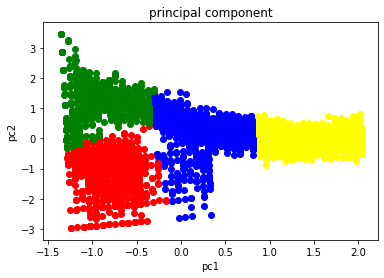

In [16]:
# 主成分をプロットする

for label in customer_clustering["cluster"].unique():
    if label == 0:
        c = "red"
    elif label == 1:
        c = "blue"
    elif label == 2:
        c = "green"
    elif label == 3:
        c = "yellow"
    else:
        pass
    plt.scatter(customer_clustering3.loc[customer_clustering3["cluster"] == label, 0],
                customer_clustering3.loc[customer_clustering3["cluster"] == label, 1], c=c)
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

# ノック35

クラスター毎に継続顧客と退会顧客がどれくらいいるのかを調べる。

In [17]:
# customerを表示

customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [18]:
# customerにcluster列を追加し、customer_id,isdeleted,clusterのみを抽出

customer["cluster"] = customer_clustering["cluster"]
customer2 = customer[["cluster","is_deleted","customer_id"]]

In [19]:
customer2.groupby(["cluster","is_deleted"]).size()

cluster  is_deleted
0        0                6
         1             1131
1        0              996
         1              122
2        0              802
         1               97
3        0             1038
dtype: int64

この結果から、ざっくりと以下のような考察が得られる。

・0は主に退会顧客、3は継続顧客をまとめている  
・1,2には継続顧客が多めだが、退会顧客も一定数含まれる

ここで、ノック33の結果と考察を改めて表示したい。

In [20]:
customer_clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,3.727674,3.482850,6.315743,1.697449,7.272647
1,5.567745,5.566190,8.245975,2.948122,22.266547
2,7.877769,7.818131,9.931034,5.904338,6.070078
3,4.635116,4.623314,7.196532,2.133911,38.863198


「・会員期間...0,1は半年ほどのグループ。2は2年弱ほどで、3は3年強。
・0は最もコミットメントが低い。  
・2は月内平均値が最も高く、4つの中で最もコミットメントが高い。  
・3は会員期間が最も長いにも関わらずコミットメントが際立って高い訳では無い。ここから、「月4 - 5回くらい(週1回くらい)でコンスタントに来る人が長続きする」という仮説が導き出せる。」

ここから、  
0...会員期間半年程で退会した会員  
1,2...一定のコミットメントが認められるが、退会者も出ている  
3...最もコミットメント高い訳では無いが、継続して長期利用している会員  
と分けられる。

次に、routine_flg(いずれかの月における特定の曜日での最大利用数が4以上の顧客が1、それ未満を0)毎に顧客を分ける。

In [21]:
customer3 = customer[["cluster","routine_flg","customer_id"]]
customer3.groupby(["cluster","routine_flg"]).size()

cluster  routine_flg
0        0               637
         1               500
1        0                39
         1              1079
2        0               103
         1               796
3        1              1038
dtype: int64

以上より、  
・0は特定の曜日にコンスタントに来ていたが辞めてしまった顧客  
・1,2は3ほどではないが、特定の曜日にコンスタントに来ている人が比較的多い  
・3は特定の曜日にコンスタントに来ている継続優良顧客  
といった考察が得られる。

# ノック36(ここから自身の解答)

ここからは、翌月の利用回数を予測していく。

まずは、月・顧客毎の利用回数を集計する。

In [22]:
# use_logを表示

use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [23]:
# 月・顧客毎の利用回数を集計

use_log["usedate"] = pd.to_datetime(use_log["usedate"])
use_log["年月"] = use_log["usedate"].dt.strftime("%Y%m")
use_log2 = use_log.groupby(["年月", "customer_id"], as_index = False).count()
use_log2.rename(columns = {"log_id" : "count"}, inplace = True)
del use_log2["usedate"]
use_log2.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


次に、4 - 10月の顧客毎の利用回数を集計していく。

In [36]:
# customer_id毎の各月利用回数を可視化する。

use_log3 = use_log2.pivot_table(index = "customer_id", columns = "年月", values = "count")
use_log3.reset_index(drop = False, inplace = True)
use_log3.head()

年月,customer_id,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903
0,AS002855,4.0,5.0,5.0,5.0,3.0,7.0,3.0,5.0,2.0,6.0,5.0,4.0
1,AS008805,NaN,NaN,8.0,7.0,5.0,2.0,2.0,3.0,5.0,1.0,6.0,1.0
2,AS009013,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AS009373,3.0,4.0,4.0,7.0,6.0,6.0,5.0,4.0,4.0,7.0,6.0,5.0
4,AS015233,NaN,7.0,7.0,5.0,11.0,9.0,7.0,7.0,9.0,9.0,4.0,8.0


In [38]:
# 4 - 10月のみに絞り込む

use_log4 = use_log3.iloc[:,0:8]
use_log4.head()

年月,customer_id,201804,201805,201806,201807,201808,201809,201810
0,AS002855,4.0,5.0,5.0,5.0,3.0,7.0,3.0
1,AS008805,NaN,NaN,8.0,7.0,5.0,2.0,2.0
2,AS009013,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AS009373,3.0,4.0,4.0,7.0,6.0,6.0,5.0
4,AS015233,NaN,7.0,7.0,5.0,11.0,9.0,7.0


In [39]:
# 順番を入れ替える

use_log5 = use_log4.reindex(columns = ["customer_id", "201810","201809","201808","201807","201806", "201805","201804"])
use_log5.head()

年月,customer_id,201810,201809,201808,201807,201806,201805,201804
0,AS002855,3.0,7.0,3.0,5.0,5.0,5.0,4.0
1,AS008805,2.0,2.0,5.0,7.0,8.0,NaN,NaN
2,AS009013,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,AS009373,5.0,6.0,6.0,7.0,4.0,4.0,3.0
4,AS015233,7.0,9.0,11.0,5.0,7.0,7.0,NaN


In [40]:
# 列名の変更

use_log5.rename(columns = {"201810":"count_pred","201809":"count_0","201808":"count_1","201807":"count_2", "201806":"count_3","201805":"count_4","201804":"count_5"}, inplace = True)
use_log5.head()

年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,AS002855,3.0,7.0,3.0,5.0,5.0,5.0,4.0
1,AS008805,2.0,2.0,5.0,7.0,8.0,NaN,NaN
2,AS009013,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,AS009373,5.0,6.0,6.0,7.0,4.0,4.0,3.0
4,AS015233,7.0,9.0,11.0,5.0,7.0,7.0,NaN


In [42]:
# 機械学習のため、欠損値を除去する

use_log5.dropna(how = "any").reset_index(drop = True)

年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,AS002855,3.0,7.0,3.0,5.0,5.0,5.0,4.0
1,AS009373,5.0,6.0,6.0,7.0,4.0,4.0,3.0
2,AS015315,4.0,7.0,3.0,6.0,3.0,3.0,6.0
3,AS015739,5.0,6.0,5.0,8.0,6.0,5.0,7.0
4,AS019860,7.0,5.0,7.0,4.0,6.0,8.0,6.0
...,...,...,...,...,...,...,...,...
2418,TS989482,2.0,7.0,6.0,8.0,4.0,7.0,6.0
2419,TS995299,4.0,5.0,7.0,5.0,2.0,7.0,4.0
2420,TS999079,6.0,4.0,3.0,2.0,6.0,5.0,7.0
2421,TS999231,5.0,4.0,3.0,5.0,1.0,4.0,6.0
